In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Set the random seed so the results are always the same
np.random.seed(12345)

# Load the Iris dataset, which is already included in sklearn
iris = load_iris()
X = iris.data
y = iris.target

model = RandomForestClassifier()

# Train the model
clf = model.fit(X,y)

In [3]:
"""
This code was written in Python 2.7
(Dave - It also works in Python 3)

This code has been adapted from the program plot_forest_iris.py located here
http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html

under the BSD 3 clause license  https://en.wikipedia.org/wiki/BSD_licenses


Copyright (c) 2016, Fairly Nerdy
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:
    * Redistributions of source code must retain the above copyright
      notice, this list of conditions and the following disclaimer.
    * Redistributions in binary form must reproduce the above copyright
      notice, this list of conditions and the following disclaimer in the
      documentation and/or other materials provided with the distribution.
    * Neither the name of the <organization> nor the
      names of its contributors may be used to endorse or promote products
      derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND
ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED
WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL Fairly Nerdy BE LIABLE FOR ANY
DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES
(INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES;
LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND
ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT
(INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS
SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

********************************************

The purpose of this code is to generate Decision Tree and Random Forest plots on the fruit dataset


There are 4 Plots that will be generated, using the Fruit data set
    1 - Decision Tree - Length vs Width
    2 - Random Forest - Length vs Width
    3 - Decision Tree - Length vs Color  (as discrete numbers)
    4 - Random Forest - Length vs Color  (as discrete numbers)

"""
print(__doc__)


This code was written in Python 2.7
(Dave - It also works in Python 3)

This code has been adapted from the program plot_forest_iris.py located here
http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html

under the BSD 3 clause license  https://en.wikipedia.org/wiki/BSD_licenses


Copyright (c) 2016, Fairly Nerdy
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:
    * Redistributions of source code must retain the above copyright
      notice, this list of conditions and the following disclaimer.
    * Redistributions in binary form must reproduce the above copyright
      notice, this list of conditions and the following disclaimer in the
      documentation and/or other materials provided with the distribution.
    * Neither the name of the <organization> nor the
      names of its contributors may be used to endorse or promote products
      derive

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.six.moves import xrange
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 4
n_estimators = 16
plot_colors = ('r','orange','yellow','blue')
markers = ('D','s','^','o')

cmap = plt.cm.RdYlBu
#cmap = plt.cm.hsv


plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration


# Load fruit data (change the following line to match your location for the file Random_Forest_Examples.csv)
path = 'C:\\dls\Maryville\\2017\\ML class 2017-10-11\\Random_Forest_Final_Programs\\'
fruit_file = open(path + 'Random_Forest_Examples.csv','r')

next(fruit_file)
fruit = []

for line in fruit_file:
    fruit.append(line.strip().split(','))

rows = len(fruit)
columns = len(fruit[0])
    
fruit = np.array(fruit)

for column in range(0,columns ):
    # loop through all the rows and columns, replace
    # categories with floats
    cnt1 = 0
    categories = {}
    for row in range(0,rows):
        if (row == 0): 
           try:
               num = float( fruit[row,column] )
               # if this is a number, break from the loop
               break
           except:
               pass
        
        item = fruit[row,column]
        if (item not in categories):
            # see if we already have an item of this category
            #  basically, change apples to 1, bananas to 2, oranges to 3
            #  etc
            categories[item] = cnt1
            cnt1+=1
        fruit[row,column] = categories[item]

    if (column == 0):
        labels = {}
        for key, value in categories.items():
            # labels for the legend in the plots
            labels[int(value)] = key


fruit = fruit.astype(np.float)

plot_idx = 1

In [6]:
#models = [DecisionTreeClassifier(max_depth=None),
#          RandomForestClassifier(n_estimators=n_estimators)  ]
def DemoDecisionTreeClassifier(depth=1):
    models = [DecisionTreeClassifier(max_depth=depth),
              RandomForestClassifier(n_estimators=n_estimators)  ]

    titles = ["Decision Tree: Length vs. Width",
              "Random Forest: Length vs. Width",
              "Decision Tree: Length vs. Color",
              "Random Forest: Length vs. Color"]
    cnt1 = 0
    y_labels = ['Width (inch)','Width (inch)',
              'Color (as a number 0-3)','Color (as a number 0-3)']

    for pair in ([1,2], [1,3]):
        for model in models:
            # We only take the two corresponding features
            X = fruit[:,pair].astype(np.float)
            y = fruit[:,0]

            np.random.seed(RANDOM_SEED)

            # Train
            clf = clone(model)
            clf = model.fit(X, y)

            scores = clf.score(X, y)

            model_title = titles[cnt1]
            plt.title(model_title)

            # Now plot the decision boundary using a fine mesh as input to a
            # filled contour plot
            x_min, x_max = 0, X[:, 0].max() + 1
            y_min, y_max = 0, X[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                                 np.arange(y_min, y_max, plot_step))

            # Plot either a single DecisionTreeClassifier or alpha blend the
            # decision surfaces of the ensemble of classifiers
            if isinstance(model, DecisionTreeClassifier):
                Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, cmap=cmap)
            else:
                # Choose alpha blend level with respect to the number of estimators
                # that are in use 
                estimator_alpha = 1.0 / len(model.estimators_)
                for tree in model.estimators_:
                    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                    Z = Z.reshape(xx.shape)
                    cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

            # Build a coarser grid to plot a set of ensemble classifications
            # to show how these are different to what we see in the decision
            # surfaces. These points are regularly space and do not have a black outline
            xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                                 np.arange(y_min, y_max, plot_step_coarser))
            Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(), yy_coarser.ravel()]).reshape(xx_coarser.shape)
            cs_points = plt.scatter(xx_coarser, yy_coarser, s=15, c=Z_points_coarser, cmap=cmap, edgecolors="none")

            # Plot the training points, these are clustered together and have a
            # black outline
            for i, c in zip(xrange(n_classes), plot_colors):
                idx = np.where(y == i)
                plt.scatter(X[idx, 0], X[idx, 1], c=c, cmap=cmap,s=60,marker=markers[i],
                            label=labels[i])
                plt.legend(loc=1)
                plt.xlabel('Length (inch)')
                plt.ylabel(y_labels[cnt1])


            plt.show()
            cnt1+=1

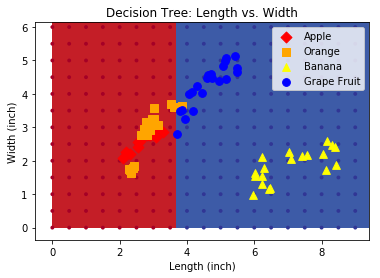

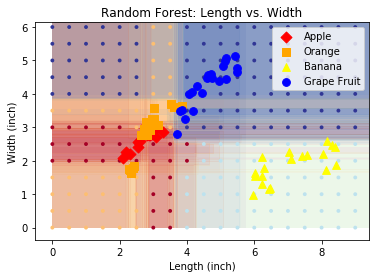

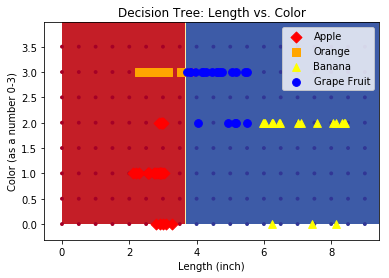

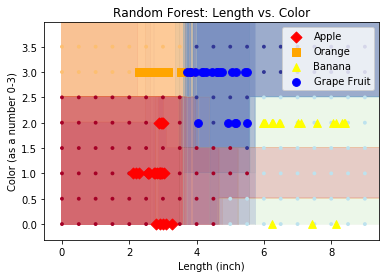

In [7]:
DemoDecisionTreeClassifier(1)

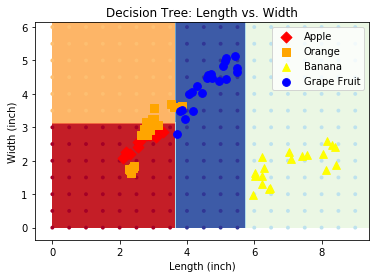

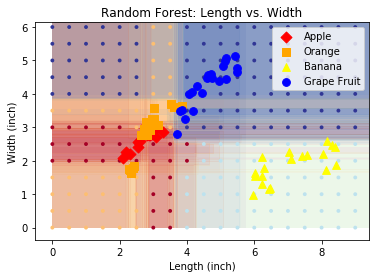

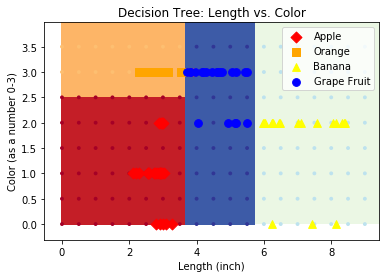

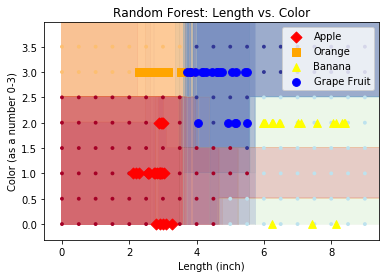

In [8]:
DemoDecisionTreeClassifier(2)

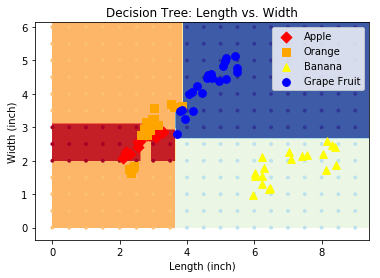

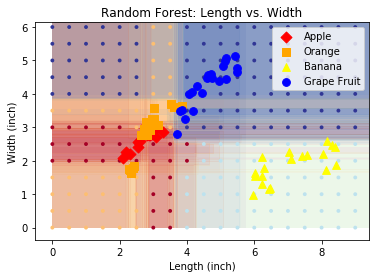

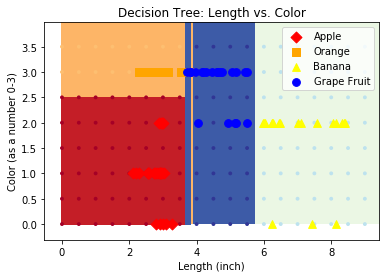

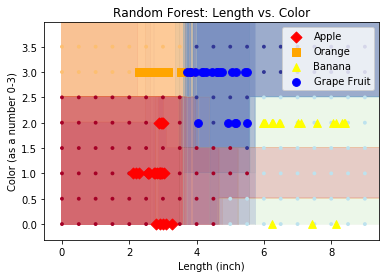

In [9]:
DemoDecisionTreeClassifier(None)